In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as inter 
import scipy.integrate as integrate
from scipy.integrate import quad, nquad
from scipy.special import ellipe
from scipy.special import ellipk

In [2]:
# Parameters for Galaxy NGC 5533
G = 4.300e-6                                                #gravitational constant (kpc/solar mass*(km/s)^2)
h = 8.9                                                     #radial scale-length (kpc)
#rho00 = 0.31e9                                              #central 3D density (solar mass/kpc^2) 
epsdisk = 5.0                                               #mass-to-light ratio disk
mu0_d = 21.27                                               # disk central surface brightness in mag arcsec^-2

z0 = lambda h: 0.2*h                                        #half-thickness (kpc)
R = lambda h: 4*h                                           #cut-off radius (kpc)
d = lambda h: 0.2*h                                         #cut-off length upper limits (kpc)

# H1 surface mass density data

[1.64006981e-02 3.88501738e+00 7.87588903e+00 1.17575631e+01
 1.57546738e+01 1.96291348e+01 2.37401817e+01 2.75064980e+01
 3.13903044e+01 3.56194206e+01 3.93728638e+01 4.35945825e+01
 4.73517376e+01 5.12228289e+01 5.52093832e+01 5.94341030e+01
 6.33070897e+01 6.70612174e+01 7.11660515e+01 7.50371691e+01
 7.91434774e+01 8.31321114e+01 8.70029394e+01 9.09909416e+01]


C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:226: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


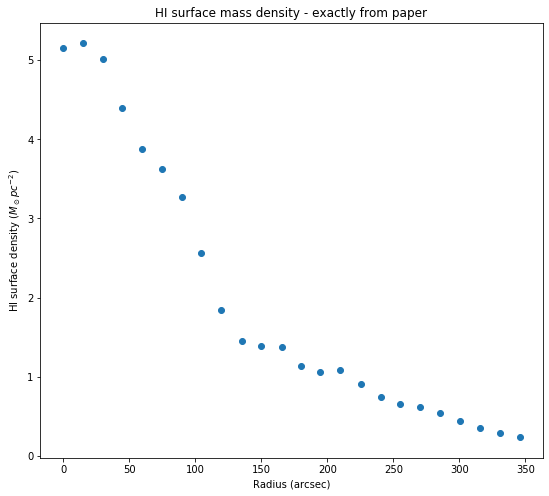

In [3]:
# from https://www.aanda.org/articles/aa/full/2005/40/aa3172-05/aa3172-05_online.html
# Used DataThief to get data from image
h1data = np.loadtxt("../data/h1data.txt")
rarcsec, h1smd = h1data.T

# Convert pc to kpc
h1smd = h1smd*1e6

# Converting arcseconds to kpc for radius measurements
D = 54.3                                    # distance in Mpc
rkpc = rarcsec*D*1000/206265                # calculated using http://astro.physics.uiowa.edu/ITU/glossary/small-angle-formula/
print(rkpc)

# Does this measured H1 data equal rho00?
rho00data = inter.UnivariateSpline(rkpc, h1smd, k=3)

# Convert univariate spline to function
def rho0function(r):
    return rho00data(r)

# Plot HI surface density
plt.figure(figsize=(9,8))
plt.scatter(rarcsec,h1smd*1e-6)
plt.title("HI surface mass density - exactly from paper")
plt.xlabel("Radius (arcsec)")
plt.ylabel("HI surface density ($M_\odot pc^{-2}$)")
plt.show()

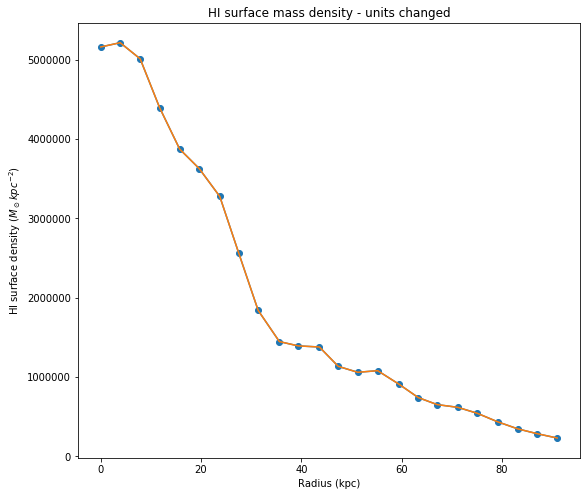

In [4]:
# Plot HI surface density
plt.figure(figsize=(9,8))
plt.scatter(rkpc,h1smd)
plt.plot(rkpc,rho00data(rkpc))
plt.plot(rkpc,rho0function(rkpc))
plt.title("HI surface mass density - units changed")
plt.xlabel("Radius (kpc)")
plt.ylabel("HI surface density ($M_\odot kpc^{-2}$)")
plt.show()

# Disk R-band photometric profile

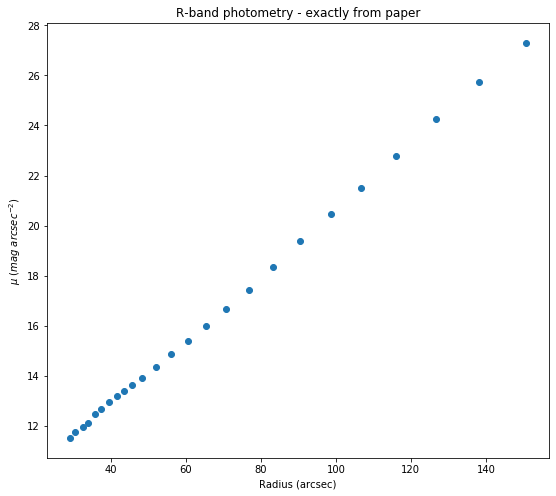

In [5]:
# According to Noordermeer's email: 
   # "For the contribution of the stars (bulge + disk), I used the 
   # R-band photometry published in Noordermeer & Van der Hulst (2007 - MNRAS 376; p1480). 
   # Again, I believe there was a tool (perhaps the same one as for the gas disk) 
   # in GIPSY to convert this into a rotation curve, but I'm afraid I can't recall the details."

# Used DataThief to get data from image
mudata = np.loadtxt("../data/nord-mu-disk.txt")
rarcsec2, mu_magarcsec = mudata.T

# Plot R-band photometry to make sure data was traced right
plt.figure(figsize=(9,8))
plt.scatter(rarcsec2,mu_magarcsec)
plt.title("R-band photometry - exactly from paper")
plt.xlabel("Radius (arcsec)")
plt.ylabel("$\mu$ ($mag$ $arcsec^{-2}$)")
plt.show()

[166.30694364 169.82629322 172.73094705 175.12768327 180.02360501
 182.96433254 186.70301017 190.15309826 193.05775209 196.50784018
 201.04591087 207.14525103 214.62404925 222.35536333 230.59603797
 240.50620316 251.46827726 264.64239027 279.4484772  295.56187479
 310.26262653 328.5173586  349.74744893 371.16367953 393.88577785]


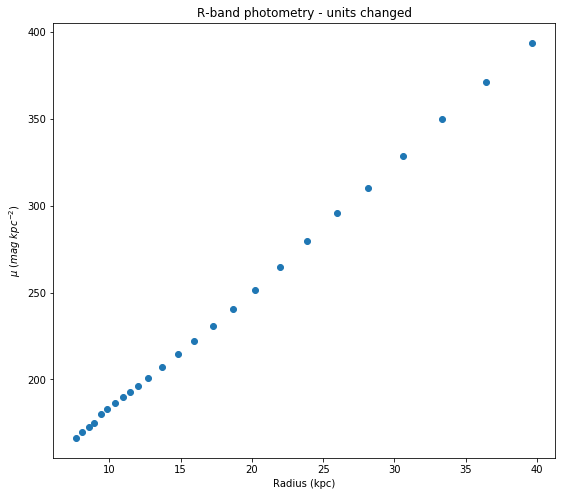

In [6]:
# Convert mag arcsec^-2 to mag kpc^-2
# First to degree: 1 degree = 3600 arcseconds
mu_degree = mu_magarcsec * 3600**2
# Then to radians: 1 radian = 180degree/Pi
mu_radians = mu_degree * (180/np.pi)**2
# Then to Mpc: 1 Mpc = 2*Pi*distance*angle(in degrees)/360degrees (source: https://www.astronomynotes.com/solarsys/s2.htm)
D = 54.3                                    # distance in Mpc
mu_Mpc = mu_radians / (D**2)
mu_kpc = mu_Mpc / (1000**2)
print(mu_kpc)

# Converting arcseconds to kpc for radius measurements
rkpc2 = rarcsec2*D*1000/206265                # calculated using http://astro.physics.uiowa.edu/ITU/glossary/small-angle-formula/

# Convert disk central surface brightness - mag arcsec^-1 to mag kpc^-2
# First to degree: 1 degree = 3600 arcseconds
mu0d_degree = mu0_d * 3600**2
# Then to radians: 1 radian = 180degree/Pi
mu0d_radians = mu0d_degree * (180/np.pi)**2
# Then to Mpc: 1 Mpc = 2*Pi*distance*angle(in degrees)/360degrees (source: https://www.astronomynotes.com/solarsys/s2.htm)
mu0d_Mpc = mu0d_radians / (D**2)
mu0d_kpc = mu0d_Mpc / (1000**2)
print(mu0d_kpc)

# Plot R-band photometry with units changed
plt.figure(figsize=(9,8))
plt.scatter(rkpc2,mu_kpc)
plt.title("R-band photometry - units changed")
plt.xlabel("Radius (kpc)")
plt.ylabel("$\mu$ ($mag$ $kpc^{-2}$)")
plt.show()

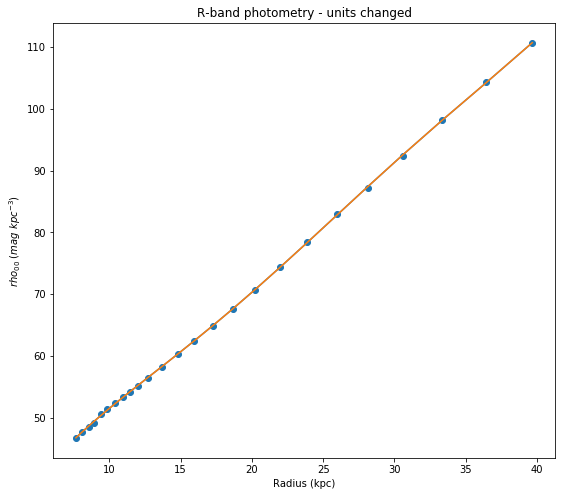

In [7]:
# rho00
z00 = 0.2*h
rho002 = mu_kpc/(2*z00)
rho00data2 = inter.UnivariateSpline(rkpc2, rho002, k=5)

# Convert univariate spline to function
def rho0function2(r):
    return rho00data2(r)

# Plot R-band photometry with units changed
plt.figure(figsize=(9,8))
plt.scatter(rkpc2,rho002)
plt.plot(rkpc2,rho00data2(rkpc2))
plt.plot(rkpc2,rho0function2(rkpc2))
plt.title("R-band photometry - units changed")
plt.xlabel("Radius (kpc)")
plt.ylabel("$rho_{00}$ ($mag$ $kpc^{-3}$)")
plt.show()

In [8]:
# Definitions
def x(r,u,xi):
    return ((r**2)+(u**2)+(xi**2))/(2*r*u)

def px(r,u,xi):
    return x(r,u,xi)-(np.sqrt((x(r,u,xi)**2)-1))

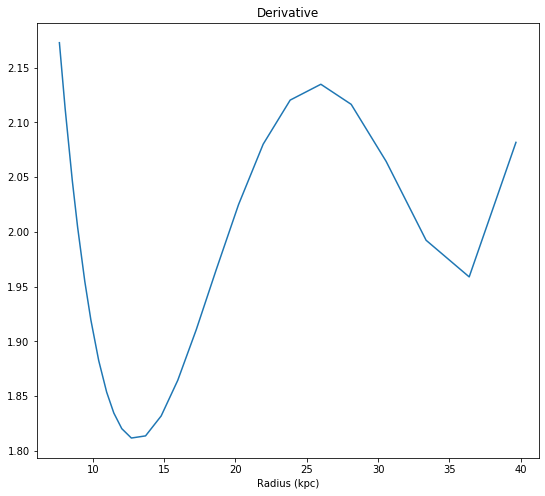

In [9]:
# Derivative of the splined traced data
drho0 = rho00data2.derivative()

# Plot Derivative
plt.figure(figsize=(9,8))
plt.plot(rkpc2,drho0(rkpc2))
plt.title("Derivative")
plt.xlabel("Radius (kpc)")
plt.ylabel("")
plt.show()

def drho0function(r):
    return drho0(r)

In [10]:
# Defining disk density distribution
def rhodata_rz(r,z,h):
    return rho0function(r)*(np.power(np.cosh(z/z0(h)), (-2)))

def drhodata_rz(r,z,h):
    return drho0function(r)*(np.power(np.cosh(z/z0(h)), (-2)))

print(type(drho0function))

<class 'function'>


In [11]:
#complete elliptic integral
def K(r,u,xi):
    K = ellipk(px(r,u,xi)) - ellipe(px(r,u,xi))
    return K

In [12]:
#inner function
def innerfunc(r,u,z,h): 
    innerf = (2*np.sqrt(u)*K(r,u,z)*drhodata_rz(u,z,h))/(np.pi*np.sqrt(r*px(r,u,z)))
    return innerf

In [19]:
#integrate inner function
innerfunc2 = lambda z,r,u,h: innerfunc(r,u,z,h)

def innerintegral(r,u,h):
    return quad(innerfunc2, 0.1, R(h)+d(h), args=(r,u,h))[0]

In [14]:
#integrate outer function
innerintegral2 = lambda u,r,h: innerintegral(r,u,h)

def outerintegral(r,h):
    return quad(innerintegral2, 0.1, R(h)+d(h), args=(r,h))[0]

In [15]:
#Radial force
def radialforce(r,h):
    F = 4*np.pi*G*outerintegral(r,h)
    return F

In [16]:
#disk velocity
rd = np.linspace(0.1, 150, num=500)
Fv = np.vectorize(radialforce)

def d_v(r,h):
    v = np.sqrt(-r*Fv(r,h))
    return v

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


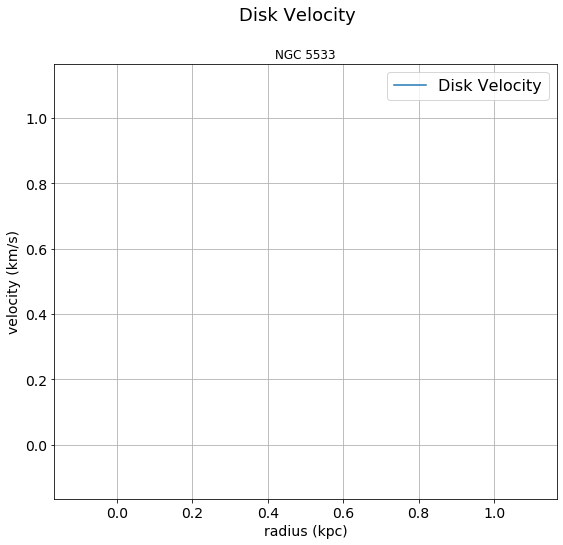

In [17]:
#plot disk velocity
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(rd, d_v(rd,h), linestyle='solid', label='Disk Velocity')

plt.axis('tight');

fig.suptitle('Disk Velocity', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
#ax.set_xlim(0,100)
#ax.set_ylim(0,700)
ax.set_xlabel('radius (kpc)', fontsize=14)
ax.set_ylabel('velocity (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
#plt.savefig('DiskVelocity100pts.png')
plt.show()